# Surface observations

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import matplotlib.path as mpath
import seaborn as sns

import cartopy.crs as ccrs

import figure_panels
import obs_surface
import util

In [77]:
stninfo = obs_surface.get_stn_info('CO2')
stninfo

,lat,lon,alt,stn,type,institution,constituent
SPO_Multi_med3_CO2,-89.98,-24.8,2810,SPO,aggregate,Multiple,CO2
SPO_Multi_median_CO2,-89.98,-24.8,2810,SPO,aggregate,Multiple,CO2
SPO_NOAA_insitu_CO2,-89.98,-24.8,2810,SPO,in situ,NOAA,CO2
SPO_NOAA_flask_CO2,-89.98,-24.8,2810,SPO,flask,NOAA,CO2
SPO_SIO_O2_flask_CO2,-89.98,-24.8,2810,SPO,flask,SIO_O2,CO2
SPO_SIO_CDK_flask_CO2,-89.98,-24.8,2810,SPO,flask,SIO_CDK,CO2
SPO_CSIRO_flask_CO2,-89.98,-24.8,2810,SPO,flask,CSIRO,CO2
HBA_NOAA_flask_CO2,-75.605,-26.21,10,HBA,flask,NOAA,CO2
SYO_NOAA_flask_CO2,-69.0125,39.59,14,SYO,flask,NOAA,CO2
SYO_TU_insitu_CO2,-69.0125,39.59,14,SYO,in situ,TU/NIPR,CO2


In [78]:
data_array = obs_surface.open_surface_data_obs('CO2')
data_array

<xarray.DataArray 'CO2' (time: 255, record: 34)>
array([[365.0911, 365.0855, 365.08  , ..., 364.93  , 364.613 ,      nan],
       [365.0878, 365.0539, 365.02  , ..., 365.03  , 364.6776,      nan],
       [364.9615, 364.9557, 364.95  , ..., 365.05  , 364.9108,      nan],
       ...,
       [408.8587, 408.8628, 408.84  , ..., 408.56  , 408.8434, 408.5241],
       [408.7141, 408.691 , 408.6337, ..., 408.57  , 408.949 ,      nan],
       [408.3551, 408.4668, 408.3322, ..., 408.3925, 408.8221,      nan]])
Coordinates:
  * time         (time) datetime64[ns] 1998-12-15 1999-01-15 ... 2020-02-14
    year_frac    (time) float64 1.999e+03 1.999e+03 ... 2.02e+03 2.02e+03
  * record       (record) object 'SPO_Multi_med3_CO2' ... 'CPT_SAWS_insitu_CO2'
    institution  (record) object 'Multiple' 'Multiple' 'NOAA' ... 'LSCE' 'SAWS'
    lat          (record) float64 -89.98 -89.98 -89.98 ... -40.68 -37.8 -34.35
    lon          (record) float64 -24.8 -24.8 -24.8 -24.8 ... 144.7 77.54 18.49
    stncode      (record) object 'SPO' 'SPO' 'SPO' 'SPO' ... 'CGO' 'AMS' 'CPT'
Attributes:
    long_name:  CO$_2$
    units:      ppm

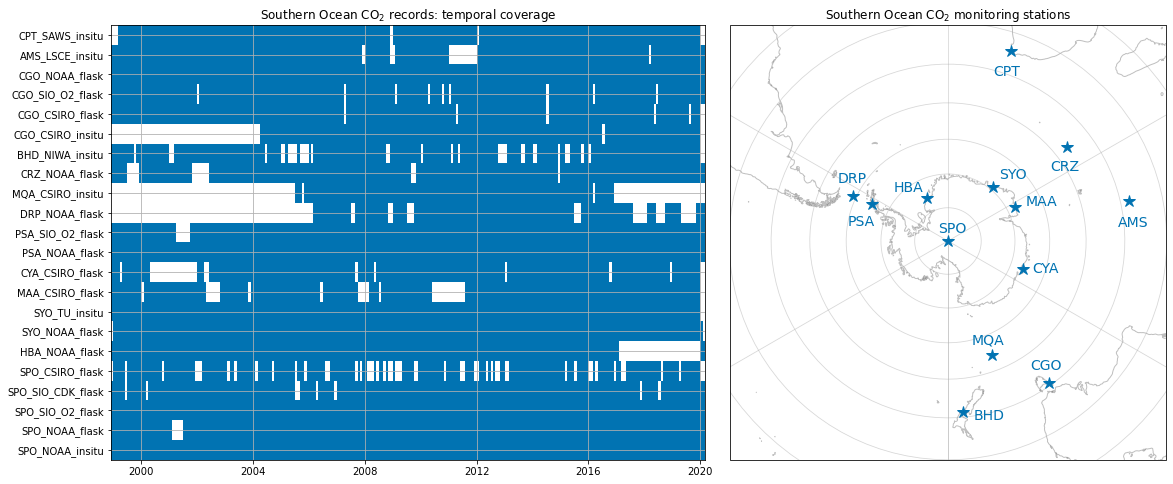

In [79]:
fig = plt.figure(figsize=(15, 8))

gsL = gridspec.GridSpec(
    nrows=1, ncols=1,
    left=0, right=0.55,
    wspace=0.05, hspace=0.01,
)
gsR = gridspec.GridSpec(
    nrows=1, ncols=1,
    left=0.55, right=1,
    wspace=0.05, hspace=0.01,
)
axs = []

records = [r for r in data_array.record.values if 'Multi' not in r and 'LMG' not in r]
da = data_array.sel(record=records)


year, mon, day = util.datetime64_parts(da.time)
year_last, mon_last = right_bnd(year[-1], mon[-1])
year = np.concatenate((year, [year_last]))
mon = np.concatenate((mon, [mon_last]))

def right_bnd(y, m):
    if m == 12:
        return y+1, 1
    else:
        return y, m + 1
    
time = [np.datetime64(f'{y:04d}-{m:02d}-01') for y, m in zip(year, mon)] + []


ax = fig.add_subplot(gsL[0, 0])
axs.append(ax)
cmap = ListedColormap(sns.color_palette(figure_panels.sns_palette, 1).as_hex()[::-1])
ax.pcolormesh(
    time,
    np.arange(0, len(da.record)+1, 1),
    np.where(np.isnan(da), np.nan, 1).T,
    cmap=cmap,
    shading='flat',
)
ax.set_yticks(np.arange(0, len(da.record), 1)+0.5);
ax.set_yticklabels(['_'.join(s.split('_')[:-1]) for s in da.record.values]);
ax.grid(True)
ax.grid(True, axis='x', which='minor')
ax.set_title('Southern Ocean CO$_2$ records: temporal coverage')
   
    

ax = fig.add_subplot(gsR[0, 0], projection=ccrs.SouthPolarStereo())
axs.append(ax)
ax.set_extent([180, -180, -90,  -30], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

#ax.set_boundary(circle, transform=ax.transAxes)

ax.coastlines('50m', color='gray', alpha=0.5)
ax.gridlines(alpha=0.5)
ax.set_title('Southern Ocean CO$_2$ monitoring stations')

util.label_stations(ax, stninfo.loc[records], fontsize=14, 
                    color=sns.color_palette(figure_panels.sns_palette, 2).as_hex()[0],
                   )

util.savefig('station-coverage')

/glade/work/mclong/miniconda3/envs/so-co2/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


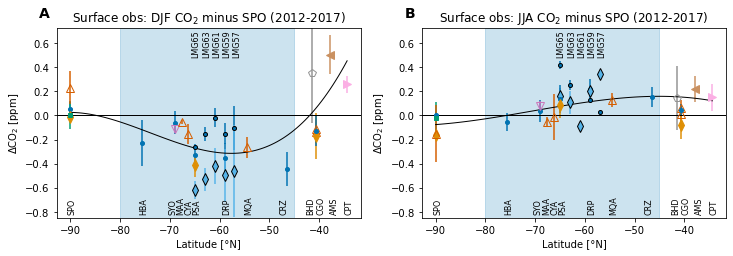

In [82]:
reference_records = obs_surface.reference_records['CO2']
reference = data_array.sel(record=reference_records).mean('record')
data_a = data_array - reference

ds = data_a.to_dataset().sel(time=slice('2012-06', '2017-11'))

ds_lmg_djf = util.ann_mean(ds, season='DJF', time_bnds_varname=None)
ds_lmg_jja = util.ann_mean(ds, season='JJA', time_bnds_varname=None)

fig, axs = util.canvas(1, 2, figsize=(6, 3.5))

figure_panels.stn_v_lat(ds_lmg_djf.CO2, axs[0, 0], include_LMG=True)
axs[0, 0].set_title(f'Surface obs: DJF CO$_2$ minus SPO (2012-2017)')
axs[0, 0].set_ylim([-0.85, 0.73])

figure_panels.stn_v_lat(ds_lmg_jja.CO2, axs[0, 1], include_LMG=True)
axs[0, 1].set_title(f'Surface obs: JJA CO$_2$ minus SPO (2012-2017)')
axs[0, 1].set_ylim([-0.85, 0.73])
util.label_plots(fig, [ax for ax in axs.ravel()], xoff=-0.02, yoff=0.04)


util.savefig('LMG-data')